In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('/Users/kaushaljha/Desktop/Telco Churn Project/data/processed/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Binary Encoding

In [6]:
binary_cols=[
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn'
]
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes':1, 'No':0, ',Female':1, 'Male':0}))
df[binary_cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,NaN,1,0,0,1,0
1,0.0,0,0,1,0,0
2,0.0,0,0,1,1,1
3,0.0,0,0,0,0,0
4,NaN,0,0,1,1,1


ONE HOT ENCODING

In [7]:
multi_cat_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

df = pd.get_dummies(data=df, columns=multi_cat_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,NaN,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0.0,0,0,0,34,1,0,56.95,1889.5,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0.0,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0.0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,NaN,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df = df.drop('customerID', axis=1)

In [10]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   3555 non-null   float64
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [12]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
MultipleLines_No phone service            -0.011942
MultipleLines_No                          -0.032569
DeviceProtec

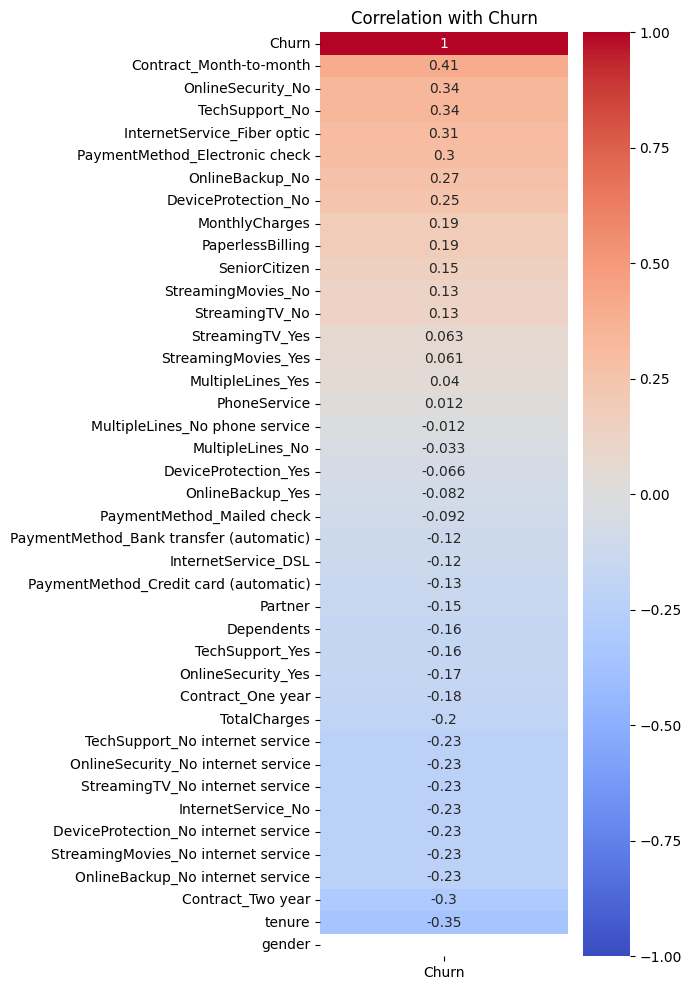

In [13]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(4,12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Churn')
plt.show()

In [14]:
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

drop_cols = [col for col in df.columns if 'No internet service' in col]
df =df.drop(columns=drop_cols)

if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service']=df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [15]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

/Users/kaushaljha/Desktop/Telco Churn Project/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/kaushaljha/Desktop/Telco Churn Project/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                    Feature         VIF
18                      DeviceProtection_No         inf
19                     DeviceProtection_Yes         inf
33                      No_internet_service         inf
32               PaymentMethod_Mailed check         inf
31           PaymentMethod_Electronic check         inf
30    PaymentMethod_Credit card (automatic)         inf
29  PaymentMethod_Bank transfer (automatic)         inf
28                        Contract_Two year         inf
27                        Contract_One year         inf
26                  Contract_Month-to-month         inf
25                      StreamingMovies_Yes         inf
24                       StreamingMovies_No         inf
23                          StreamingTV_Yes         inf
22                           StreamingTV_No         inf
21                          TechSupport_Yes         inf
20                           TechSupport_No         inf
34                         No_phone_service     

In [18]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import time

X= df.drop(columns=['Churn'])
y= df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
THRESHOLD = 0.3

In [20]:
rf = RandomForestClassifier(
    n_estimators=300, 
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)
proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for random forest classifier")

print(f"{'Thresh':<8} {'Prec_1':<8} {'Rec_1':<8} {'F1_1':<8}")
for thresh in [0.25,0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]:
    y_pred = (proba >= thresh).astype(int)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{thresh:<8.2f} {prec_1:<8.2f} {rec_1:<8.2f} {f1_1:<8.2f}")

Threshold tuning for random forest classifier
Thresh   Prec_1   Rec_1    F1_1    
0.25     0.50     0.77     0.61    
0.30     0.53     0.71     0.60    
0.35     0.54     0.64     0.59    
0.40     0.57     0.59     0.58    
0.45     0.58     0.55     0.57    
0.50     0.61     0.50     0.55    
0.55     0.64     0.45     0.53    
0.60     0.67     0.40     0.50    
0.65     0.68     0.33     0.45    


In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=300,
    random_state=42,
    learning_rate=0.05,
    class_weight='balanced',
    n_jobs=-1
)

start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.2f} seconds")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training time: 2.62 seconds
Prediction time: 0.01 seconds
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1035
           1       0.48      0.83      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71     

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for lightlgbm classifier")

print(f"{'Thresh':<8} {'Prec_1':<8} {'Rec_1':<8} {'F1_1':<8}")
for thresh in [0.25,0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]:
    y_pred = (proba >= thresh).astype(int)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{thresh:<8.2f} {prec_1:<8.2f} {rec_1:<8.2f} {f1_1:<8.2f}")

Threshold tuning for lightlgbm classifier
Thresh   Prec_1   Rec_1    F1_1    
0.25     0.46     0.87     0.60    
0.30     0.48     0.83     0.61    
0.35     0.50     0.81     0.62    
0.40     0.51     0.78     0.61    
0.45     0.52     0.75     0.61    
0.50     0.54     0.72     0.62    
0.55     0.55     0.70     0.62    
0.60     0.56     0.65     0.60    
0.65     0.59     0.60     0.60    


In [24]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()
xgb = XGBClassifier(
    n_estimators=300,
    random_state=42,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    n_jobs=-1
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")   

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.2f} seconds")
print(classification_report(y_test, y_pred))

Training time: 0.60 seconds
Prediction time: 0.01 seconds
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1035
           1       0.47      0.84      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409



In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.459   0.872   0.601   
0.3     0.474   0.840   0.606   
0.35    0.492   0.816   0.614   
0.4     0.507   0.783   0.616   
0.45    0.518   0.746   0.611   
0.5     0.539   0.719   0.616   


In [26]:
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    return recall_score(y_test, y_pred, pos_label=1)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best recall:", study.best_value)

/Users/kaushaljha/Desktop/Telco Churn Project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-30 18:59:52,059] A new study created in memory with name: no-name-ca71e0b1-bd58-478f-b123-1503618dad97
[I 2025-10-30 18:59:53,079] Trial 0 finished with value: 0.8288770053475936 and parameters: {'n_estimators': 750, 'learning_rate': 0.1795586554215709, 'max_depth': 3, 'subsample': 0.5102603883578156, 'colsample_bytree': 0.925904820017682, 'min_child_weight': 5, 'gamma': 1.0488177576986564, 'reg_alpha': 0.4852278304280566, 'reg_lambda': 2.4812044752356996}. Best is trial 0 with value: 0.8288770053475936.
[I 2025-10-30 18:59:54,195] Trial 1 finished with value: 0.9037433155080213 and parameters: {'n_estimators': 723, 'learning_rate': 0.02064987629739986, 'max_depth': 4, 'subsample': 0.8067764785

Best params: {'n_estimators': 426, 'learning_rate': 0.010719922634244455, 'max_depth': 3, 'subsample': 0.9722627138091693, 'colsample_bytree': 0.7962821061818254, 'min_child_weight': 10, 'gamma': 4.794301950496697, 'reg_alpha': 4.791250907067934, 'reg_lambda': 0.6525675010448413}
Best recall: 0.9331550802139037


In [27]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})
xgb = XGBClassifier(**best_params)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.2f} seconds")
print(classification_report(y_test, y_pred, digits=3))

Training time: 0.61 seconds
Prediction time: 0.01 seconds
              precision    recall  f1-score   support

           0      0.957     0.541     0.691      1035
           1      0.424     0.933     0.583       374

    accuracy                          0.645      1409
   macro avg      0.690     0.737     0.637      1409
weighted avg      0.816     0.645     0.662      1409



In [28]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn -XGboost")

with mlflow.start_run():
    #calculate scale_pos_weight
    scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()

    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    mlflow.log_params(best_params)

    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time) 

    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    #Metrics
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision_1", precision_1)
    mlflow.log_metric("recall_1", recall_1)
    mlflow.log_metric("f1_1", f1_1)
    mlflow.log_metric("auc", auc)

    #Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

2025/10/30 19:01:25 INFO mlflow.tracking.fluent: Experiment with name 'Telco Churn -XGboost' does not exist. Creating a new experiment.
2025/10/30 19:01:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Users/kaushaljha/Desktop/Telco Churn Project/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [19:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
2025/10/30 19:01:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.957     0.541     0.691      1035
           1      0.424     0.933     0.583       374

    accuracy                          0.645      1409
   macro avg      0.690     0.737     0.637      1409
weighted avg      0.816     0.645     0.662      1409

